# Support Vector Classification & kNN with sklearn

Credits: https://github.com/ksopyla/svm_mnist_digit_classification

In [2]:
!git clone https://github.com/RACHELI7AYALA/mlcourse mlcourse

fatal: destination path 'mlcourse' already exists and is not an empty directory.


In [4]:
# standard imports
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
%matplotlib inline

# import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
# fetch original mnist dataset
from sklearn.datasets import fetch_openml
from matplotlib.colors import Normalize
import seaborn as sb


In [5]:
mnist = fetch_openml('mnist_784')

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0],nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))



In [8]:
# load data

# fetch mnist data
# mnist = fetch_mldata('MNIST original', data_home='./')

# mnist object contains: data, COL_NAMES, DESCR, target fields
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

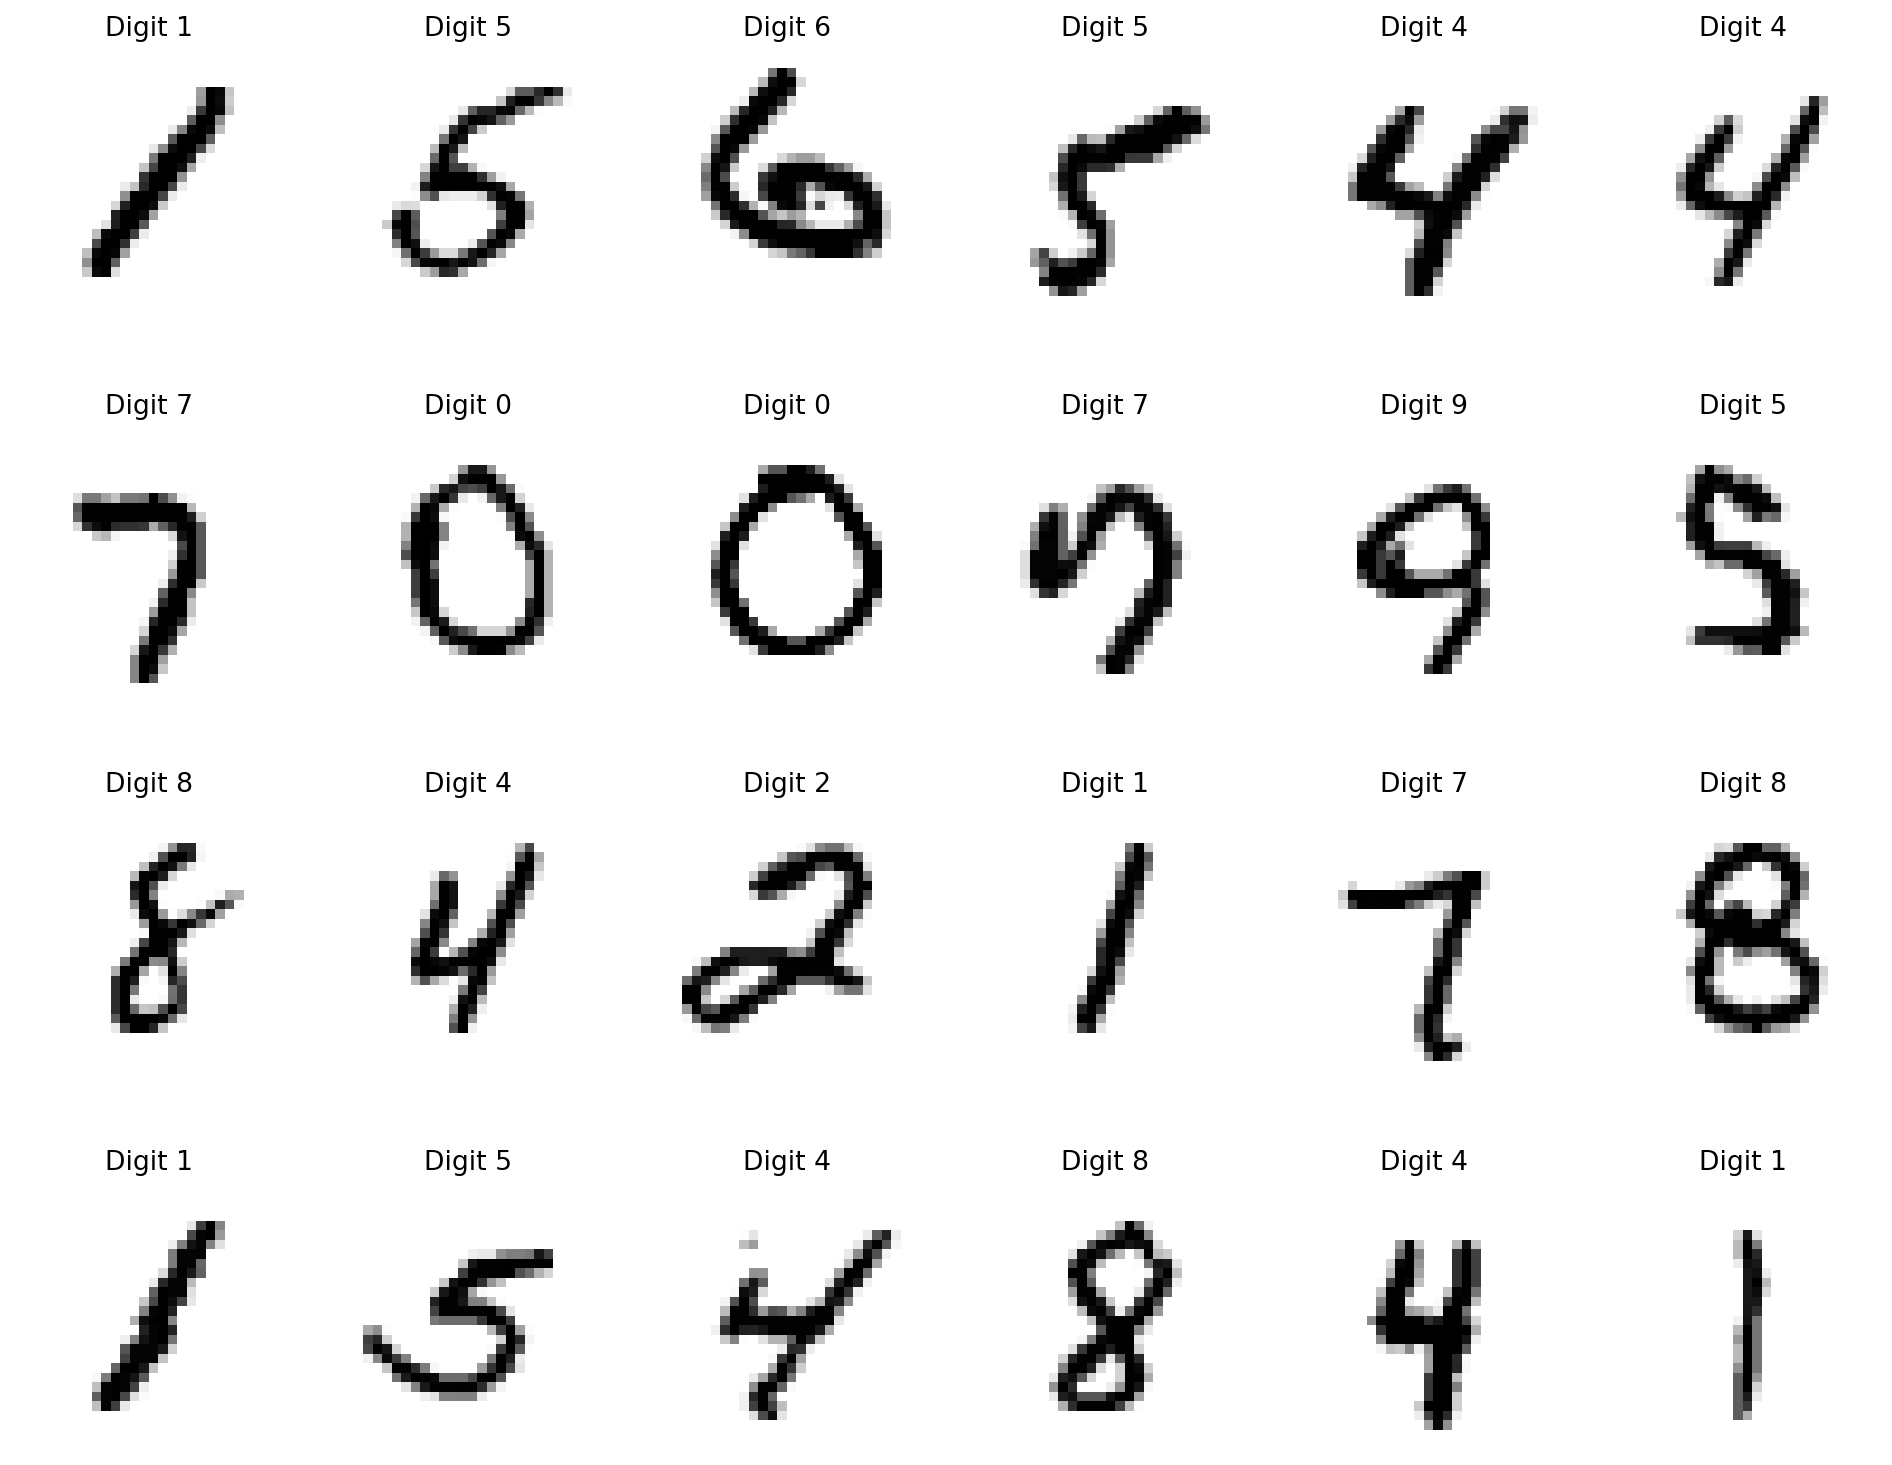

In [9]:
# split data into image and targets

# data field is 70k x 784 array, each row represents pixels from 28x28=784 image
images = mnist.data.values[:5000, :]
targets = mnist.target[:5000]

# Let's have a look at the random 16 images, 
# We have to reshape each data row, from flat array of 784 int to 28x28 2D array

#pick  random indexes from 0 to size of our dataset
show_some_digits(images, targets)

In [10]:
#full dataset classification
# normalise x values
X_data = images/255.0
# set y as the targets
Y = targets

#split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

In [11]:
# create a support vector classifier, and train it

# set params to pre-determined optimal values
param_C = 100
param_gamma = 0.05

# create clasifier according to params
classifier1 = svm.SVC(C=param_C,gamma=0.5)
start_time = dt.datetime.now()
classifier2 = svm.SVC(C=param_C,gamma=0.05)
classifier2.fit(X_train, y_train)
end_time = dt.datetime.now() 
classifier3 = svm.SVC(C=param_C,gamma=0.005)
# we learn the digits on train part
# start timing



# train our SVM
classifier1.fit(X_train, y_train)

classifier3.fit(X_train, y_train)

# stop timing, print elapsed
print('Start learning at {}'.format(str(start_time)))
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2022-06-20 12:58:56.375307
Stop learning 2022-06-20 12:59:01.128075
Elapsed learning 0:00:04.752768


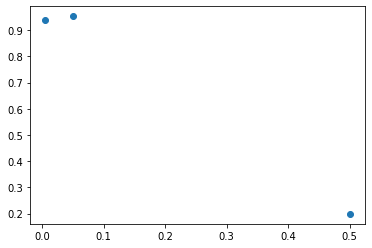

In [12]:
# now predict the value of the test

# get actual y values
expected = y_test
# predicted y values based on x values using SVM model
predicted1 = classifier1.predict(X_test)
predicted2 = classifier2.predict(X_test)
predicted3 = classifier3.predict(X_test)

# show a few digits and the predictions
# show_some_digits(X_test,predicted,title_text="Predicted {}")


# print metrics
# print("Classification report for classifier %s:\n%s\n"
#       % (classifier, metrics.classification_report(expected, predicted)))
      
# cm = metrics.confusion_matrix(expected, predicted)
# print("Confusion matrix:\n%s" % cm)

#plot_confusion_matrix(cm)
Accuracy=[]
Accuracy.append(metrics.accuracy_score(expected, predicted1))
Accuracy.append(metrics.accuracy_score(expected, predicted2))
Accuracy.append(metrics.accuracy_score(expected, predicted3))
plt.scatter([0.5,0.05,0.005],Accuracy)
# print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

NameError: ignored

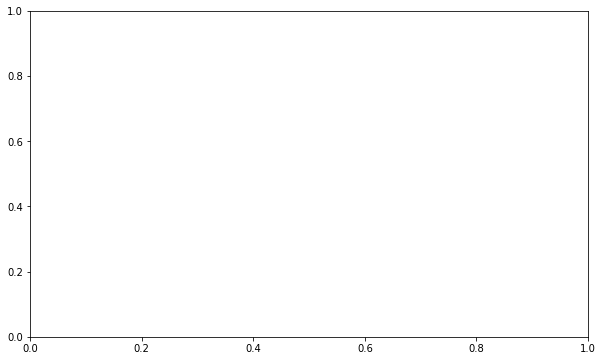

In [13]:
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Start learning at 2022-06-20 12:59:35.658731
Stop learning 2022-06-20 12:59:35.840969
Elapsed learning 0:00:00.182238


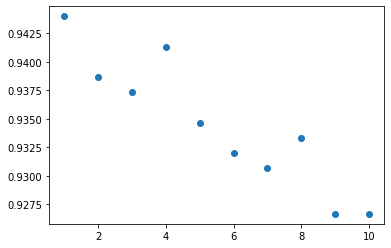

In [14]:
Accuracy=[]
for i in range (1,11):
    if i==1:
      start_time = dt.datetime.now()
      neigh = KNeighborsClassifier(n_neighbors=i)
      neigh.fit(X_train, y_train)
      predicted = neigh.predict(X_test)
      end_time = dt.datetime.now() 
    else:
      neigh = KNeighborsClassifier(n_neighbors=i)
      neigh.fit(X_train, y_train)
      predicted = neigh.predict(X_test)
    Accuracy.append(metrics.accuracy_score(expected, predicted))
print('Start learning at {}'.format(str(start_time)))
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))    
x=np.arange(1,11)
plt.scatter(x,Accuracy) 
   
# print metrics
# print("Classification report for classifier %s:\n%s\n"
#       % (classifier, metrics.classification_report(expected, predicted)))
      
# cm = metrics.confusion_matrix(expected, predicted)
# print("Confusion matrix:\n%s" % cm)

#plot_confusion_matrix(cm)

# print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

# plt.subplots(figsize=(10, 6))
# sb.heatmap(cm, annot = True, fmt = 'g')
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

In [3]:
predicted=neigh.predict(images[:100])
arr=np.array(targets[:100][:])
arr
# incorrects = np.nonzero(predicted.reshape(-1,1)!= arr)
# for i in incorrects:
#     print(images[i])

NameError: ignored

In [29]:
fnames = test_generator.mnist ## fnames is all the filenames/samples used in testing
errors = np.where(y_pred != test_generator.classes)[0] ## misclassifications done on the test data where y_pred is the predicted values
for i in errors:
    print(fnames[i])

NameError: ignored